In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Исходные данные (по варианту)
_U_0 = 10 # амплитуда несущих колебаний, мВ
_f_0 = 100 # частота несущих колебаний, МГц
_m_1 = 30 # глубина модуляции, %
_F_M1 = 200 # частота управляющего сигнала, КГц

In [56]:
# Перевод в систему СИ
U_0 = _U_0 / 1000
f_0 = _f_0 * pow(10, 6)
m_1 = _m_1 / 100
F_M1 = _F_M1 * 1000
print("Дано:")
print(f"U_0 = {_U_0} мВ = {U_0} В")
print(f"f_0 = {_f_0} МГц = {f_0} Гц")
print(f"m_1 = {_m_1} % = {m_1}")
print(f"F_M1 = {_F_M1} КГц = {F_M1} Гц")

Дано:
U_0 = 10 мВ = 0.01 В
f_0 = 100 МГц = 100000000 Гц
m_1 = 30 % = 0.3
F_M1 = 200 КГц = 200000 Гц


In [57]:
print(f"Амплитуда центральной гармоники A_0 = {U_0} В")
print(f"Амплитуда нижней гармоники A_нижн. = {U_0 * m_1 / 2} В")
print(f"Амплитуда верхней гармоники A_верх. = {U_0 * m_1 / 2} В")

Амплитуда центральной гармоники A_0 = 0.01 В
Амплитуда нижней гармоники A_нижн. = 0.0015 В
Амплитуда верхней гармоники A_верх. = 0.0015 В


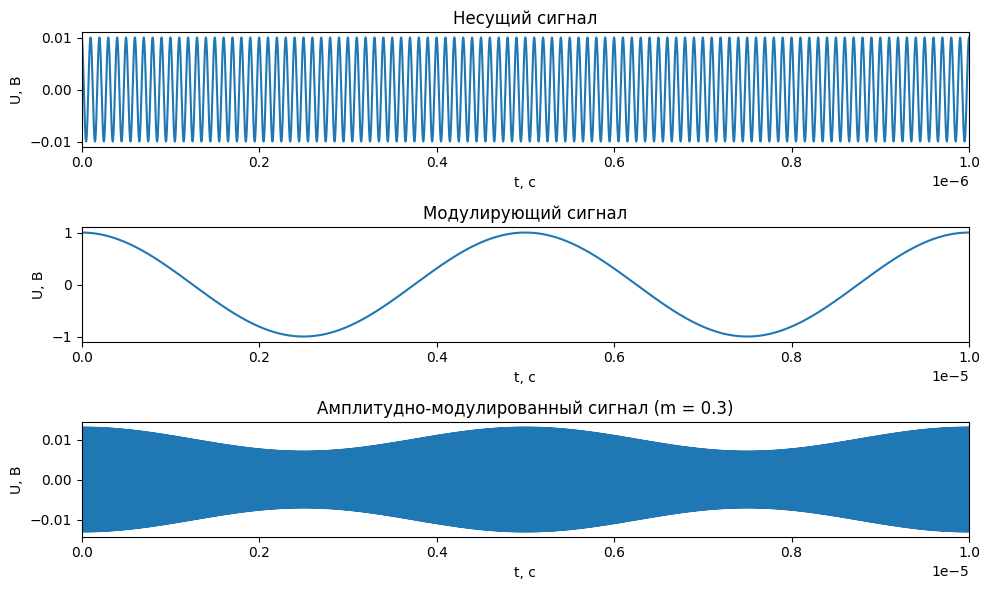

In [58]:
t = np.linspace(0, 1 / f_0 * 1000, int(f_0 / 100))
carrier_signal = U_0 * np.cos(2 * np.pi * f_0 * t)
modulating_signal = np.cos(2 * np.pi * F_M1 * t)
output_signal = (1 + m_1 * modulating_signal) * carrier_signal

plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(t, carrier_signal)
plt.xlim(0, 1 / f_0 * 100)
plt.xlabel('t, с')
plt.ylabel('U, В')
plt.title('Несущий сигнал')

plt.subplot(3, 1, 2)
plt.plot(t, modulating_signal)
plt.xlim(0, 1 / f_0 * 1000)
plt.xlabel('t, с')
plt.ylabel('U, В')
plt.title('Модулирующий сигнал')

plt.subplot(3, 1, 3)
plt.plot(t, output_signal)
plt.xlim(0, 1 / f_0 * 1000)
plt.xlabel('t, с')
plt.ylabel('U, В')
plt.title(f'Амплитудно-модулированный сигнал (m = {m_1})')

plt.tight_layout()
plt.show()

[ 2.23490431e-06+6.97905471e-09j  2.71961898e-06+8.50124302e-09j
  3.50445366e-06+1.09655634e-08j  5.13475116e-06+1.60829552e-08j
  1.50536980e-03+4.71981566e-06j  8.99880036e-06+2.82423872e-08j
  9.99994295e-03+3.14158507e-05j -9.00113349e-06-2.83062660e-08j
  1.49461977e-03+4.70489300e-06j -5.13189301e-06-1.61707378e-08j]
[2.23491521e-06 2.63885922e-08 2.63885922e-08 2.63885922e-08
 2.63885922e-08 2.63885922e-08 2.63885922e-08 2.63885922e-08
 2.63885922e-08 2.63885922e-08]
[994.  994.1 994.2 994.3 994.4 994.5 994.6 994.7 994.8 994.9]
100000000


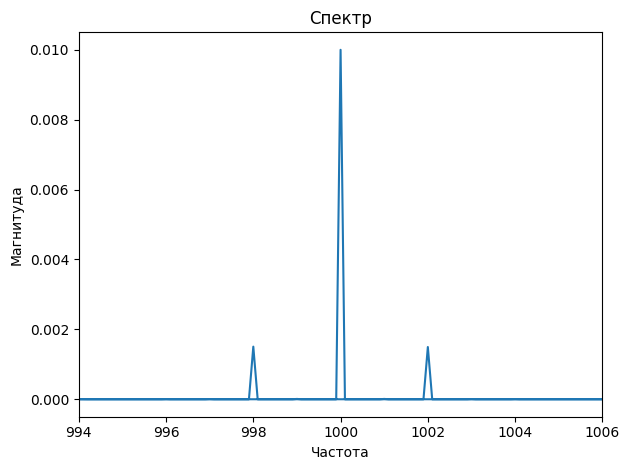

In [129]:
spectrum = np.fft.fft(output_signal) / len(output_signal) * 2
freq = np.fft.fftfreq(len(output_signal), 1 / len(output_signal))

spectrum = spectrum[0:len(spectrum)]
freq = freq[0:len(freq)]

mean_value = np.mean(np.abs(spectrum))
spectrum = spectrum[(f_0 - F_M1 * 3) // 100000:(f_0 + F_M1 * 4) // 100000]
freq = freq[(f_0 - F_M1 * 3) // 100000:(f_0 + F_M1 * 4) // 100000]

extended_arr1 = np.zeros(len(spectrum) * 10)
for i in range(len(spectrum) - 1):
    start_index = i * 10
    end_index = start_index + 10
    extended_arr1[start_index] = np.abs(spectrum[i])
    extended_arr1[start_index+1:end_index] = np.linspace(mean_value, mean_value, 9, endpoint=False)
extended_arr1[-11:-1] = np.linspace(mean_value, mean_value, 10, endpoint=False)

expanded_array = np.zeros(len(freq) * 10)
for i in range(len(freq) - 1):
    start_index = i * 10
    end_index = start_index + 10
    expanded_array[start_index:end_index] = np.linspace(freq[i], freq[i + 1], 10, endpoint=False)
expanded_array[-11:-1] = np.linspace(freq[i], freq[i], 10, endpoint=False)

print(spectrum[0:10])

spectrum = extended_arr1
print(spectrum[0:10])
freq = expanded_array

print(freq[0:10])

plt.plot(freq, np.abs(spectrum))
#plt.plot(t, output_signal)
print(f_0)
plt.xlim((f_0 - F_M1 * 3) / 100000, (f_0 + F_M1 * 3) / 100000)
plt.xlabel('Частота')
plt.ylabel('Магнитуда')
plt.title('Спектр')

plt.tight_layout()
plt.show()